In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [4]:
def add_accuracy_column(merged_csv_path, ground_truth_json_path, output_path):
    """add accuracy column to merged csv based on ground truth json"""
    
    df = pd.read_csv(merged_csv_path)
    
    with open(ground_truth_json_path, "r") as f:
        gt_data = json.load(f)
    
    Questions = ["Q0", "Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8"]
    
    accuracies = []
    corrects = []
    
    for _, row in df.iterrows():
        case_id = row["case_id"]
        gt_entry = gt_data.get(case_id)
        
        if not gt_entry:
            accuracies.append(None)
            corrects.append(None)
            continue
        
        correct = 0
        total = 0
        for q in Questions:
            pred = str(row.get(q, "")).strip()
            true = str(gt_entry.get(q, "")).strip()
            if pred == true and pred != "":
                correct += 1
            total += 1
        
        acc = 100 * correct / total if total > 0 else 0
        accuracies.append(acc)
        corrects.append(correct)
    
    df['correct'] = corrects
    df['total'] = 9
    df['accuracy'] = accuracies
    
    df.to_csv(output_path, index=False)

    print(f"   location: {output_path}")
    print(f"   Total rows: {len(df)}")
    print(f"   Average accuracy: {df['accuracy'].mean():.2f}%")
    
    return df

In [5]:
internal_qa_matched_dir = "/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_rag_matched_results_merged.csv"
baseline_matched_dir = "/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_baseline_matched_results_merged.csv"
internal_qa_unmatched_dir = "/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_sentence_unmatched_results_merged.csv"
baseline_unmatched_dir = "/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_baseline_unmatched_results_merged.csv"
ground_truth_json_path = "/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/dataset/ground_truth.json"

In [26]:
rag_matched_df = add_accuracy_column(
    merged_csv_path=internal_qa_matched_dir,
    ground_truth_json_path=ground_truth_json_path,
    output_path=internal_qa_matched_dir.replace(".csv", "_with_accuracy.csv")
)
baseline_matched_df = add_accuracy_column(
    merged_csv_path=baseline_matched_dir,
    ground_truth_json_path=ground_truth_json_path,
    output_path=baseline_matched_dir.replace(".csv", "_with_accuracy.csv")
)

rag_unmatched_df = add_accuracy_column(
    merged_csv_path=internal_qa_unmatched_dir,
    ground_truth_json_path=ground_truth_json_path,
    output_path=internal_qa_unmatched_dir.replace(".csv", "_with_accuracy.csv")
)
baseline_unmatched_df = add_accuracy_column(
    merged_csv_path=baseline_unmatched_dir,
    ground_truth_json_path=ground_truth_json_path,
    output_path=baseline_unmatched_dir.replace(".csv", "_with_accuracy.csv")
)


   location: /home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_rag_matched_results_merged_with_accuracy.csv
   Total rows: 615
   Average accuracy: 68.85%
   location: /home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_baseline_matched_results_merged_with_accuracy.csv
   Total rows: 615
   Average accuracy: 61.54%
   location: /home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_sentence_unmatched_results_merged_with_accuracy.csv
   Total rows: 1081
   Average accuracy: 57.57%
   location: /home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_baseline_unmatched_results_merged_with_accuracy.csv
   Total rows: 1081
   Average accuracy: 58.07%


In [27]:
rag_pivot = rag_matched_df.pivot_table(
    values='accuracy',
    index=['qna_model'],
    columns=['top_k', 'retrieval_count'],
    aggfunc='mean'
)

print("=== RAG Matched Accuracy Pivot ===")
print(rag_pivot.round(2))

baseline_pivot = baseline_matched_df.pivot_table(
    values='accuracy',
    index=['qna_model'],
    columns=['top_k', 'retrieval_count'],
    aggfunc='mean'
)

print("=== Baseline Matched Accuracy Pivot ===")
print(baseline_pivot.round(2))

rag_pivot2 = rag_unmatched_df.pivot_table(
    values='accuracy',
    index=['qna_model'],
    columns=['top_k', 'retrieval_count'],
    aggfunc='mean'
)

print("=== RAG Unmatched Accuracy Pivot ===")
print(rag_pivot2.round(2))

baseline_pivot2 = baseline_unmatched_df.pivot_table(
    values='accuracy',
    index=['qna_model'],
    columns=['top_k', 'retrieval_count'],
    aggfunc='mean'
)

print("=== Baseline Unmatched Accuracy Pivot ===")
print(baseline_pivot2.round(2))

=== RAG Matched Accuracy Pivot ===
top_k                1             3       
retrieval_count     10     30     10     30
qna_model                                  
gpt-5            68.95  68.95  68.02  66.80
gpt-5-mini       71.39  73.70  67.72  65.58
=== Baseline Matched Accuracy Pivot ===
top_k                1             3       
retrieval_count     10     30     10     30
qna_model                                  
gpt-5            60.73  59.97  60.36  61.38
gpt-5-mini       62.40  62.45  62.91  62.06
=== RAG Unmatched Accuracy Pivot ===
top_k                1             3       
retrieval_count     10     30     10     30
qna_model                                  
gpt_5            55.56  55.89  58.21  61.37
gpt_5_mini       54.76  53.88  59.26  61.97
=== Baseline Unmatched Accuracy Pivot ===
top_k                1             3       
retrieval_count     10     30     10     30
qna_model                                  
gpt_5            56.12  57.55  56.76  58.63
gpt_5_mini

In [29]:
rag_pivot3 = rag_matched_df.pivot_table(
    values='accuracy',
    index=['qna_model'],
    columns=['top_k', 'retrieval_count', 'retrieval_model'],
    aggfunc='mean'
)

print("=== RAG Matched Accuracy Pivot ===")
print(rag_pivot3.round(2))

baseline_pivot3 = baseline_matched_df.pivot_table(
    values='accuracy',
    index=['qna_model'],
    columns=['top_k', 'retrieval_count', 'retrieval_model'],
    aggfunc='mean'
)

print("=== Baseline Matched Accuracy Pivot ===")
print(baseline_pivot3.round(2))

=== RAG Matched Accuracy Pivot ===
top_k                1                                   3                    \
retrieval_count     10                30                10                30   
retrieval_model  gpt-5 gpt-5-mini  gpt-5 gpt-5-mini  gpt-5 gpt-5-mini  gpt-5   
qna_model                                                                      
gpt-5            69.14      68.77  68.09      69.80  69.07      66.97  66.94   
gpt-5-mini       71.17      71.60  74.07      73.33  69.37      66.07  66.67   

top_k                       
retrieval_count             
retrieval_model gpt-5-mini  
qna_model                   
gpt-5                66.67  
gpt-5-mini           64.50  
=== Baseline Matched Accuracy Pivot ===
top_k                1                                   3                    \
retrieval_count     10                30                10                30   
retrieval_model  gpt-5 gpt-5-mini  gpt-5 gpt-5-mini  gpt-5 gpt-5-mini  gpt-5   
qna_model                     

In [17]:
def calculate_averages(matched_df, unmatched_df, top_k_val):
    """Calculate average accuracies for matched and unmatched dataframes for a given top_k value."""
    results = {}
    
    for qna_model in ['gpt-5-mini', 'gpt-5']:
        # Matched
        matched_data = matched_df[
            (matched_df['top_k'] == top_k_val) & 
            (matched_df['qna_model'] == qna_model)
        ]['accuracy']
        
        # Unmatched
        qna_model_underscore = qna_model.replace('-', '_')
        unmatched_data = unmatched_df[
            (unmatched_df['top_k'] == top_k_val) & 
            ((unmatched_df['qna_model'] == qna_model) | 
             (unmatched_df['qna_model'] == qna_model_underscore))
        ]['accuracy']
        
        matched_avg = matched_data.mean() if len(matched_data) > 0 else 0
        unmatched_avg = unmatched_data.mean() if len(unmatched_data) > 0 else 0
        overall_avg = (matched_avg + unmatched_avg) / 2
        
        model_key = qna_model.replace('-', '_')
        results[f'{model_key}_matched'] = matched_avg
        results[f'{model_key}_unmatched'] = unmatched_avg
        results[f'{model_key}_overall'] = overall_avg
    
    return results

In [18]:
baseline_top1 = calculate_averages(baseline_matched_df, baseline_unmatched_df, 1)
internal_top1 = calculate_averages(rag_matched_df, rag_unmatched_df, 1)

baseline_top3 = calculate_averages(baseline_matched_df, baseline_unmatched_df, 3)
internal_top3 = calculate_averages(rag_matched_df, rag_unmatched_df, 3)

In [8]:
print("=== RAG Matched ===")
print(rag_matched_df[['top_k', 'qna_model', 'accuracy']].groupby(['top_k', 'qna_model']).agg(['count', 'mean']))

print("\n=== RAG Unmatched ===")
print(rag_unmatched_df[['top_k', 'qna_model', 'accuracy']].groupby(['top_k', 'qna_model']).agg(['count', 'mean']))

print("\n=== Baseline Matched ===")
print(baseline_matched_df[['top_k', 'qna_model', 'accuracy']].groupby(['top_k', 'qna_model']).agg(['count', 'mean']))

print("\n=== Baseline Unmatched ===")
print(baseline_unmatched_df[['top_k', 'qna_model', 'accuracy']].groupby(['top_k', 'qna_model']).agg(['count', 'mean']))

# 각 dataframe에 실제로 데이터가 있는지 확인
print(f"\nRAG Matched rows: {len(rag_matched_df)}")
print(f"RAG Unmatched rows: {len(rag_unmatched_df)}")
print(f"Baseline Matched rows: {len(baseline_matched_df)}")
print(f"Baseline Unmatched rows: {len(baseline_unmatched_df)}")

=== RAG Matched ===
                 accuracy           
                    count       mean
top_k qna_model                     
1     gpt-5           151  68.947756
      gpt-5-mini      152  72.587719
3     gpt-5           156  67.378917
      gpt-5-mini      156  66.595442

=== RAG Unmatched ===
                 accuracy           
                    count       mean
top_k qna_model                     
1     gpt_5           273  55.718356
      gpt_5_mini      272  54.330065
3     gpt_5           268  59.742952
      gpt_5_mini      268  60.572139

=== Baseline Matched ===
                 accuracy           
                    count       mean
top_k qna_model                     
1     gpt-5           151  60.338484
      gpt-5-mini      152  62.426901
3     gpt-5           156  60.897436
      gpt-5-mini      156  62.464387

=== Baseline Unmatched ===
                 accuracy           
                    count       mean
top_k qna_model                     
1     gpt_5    

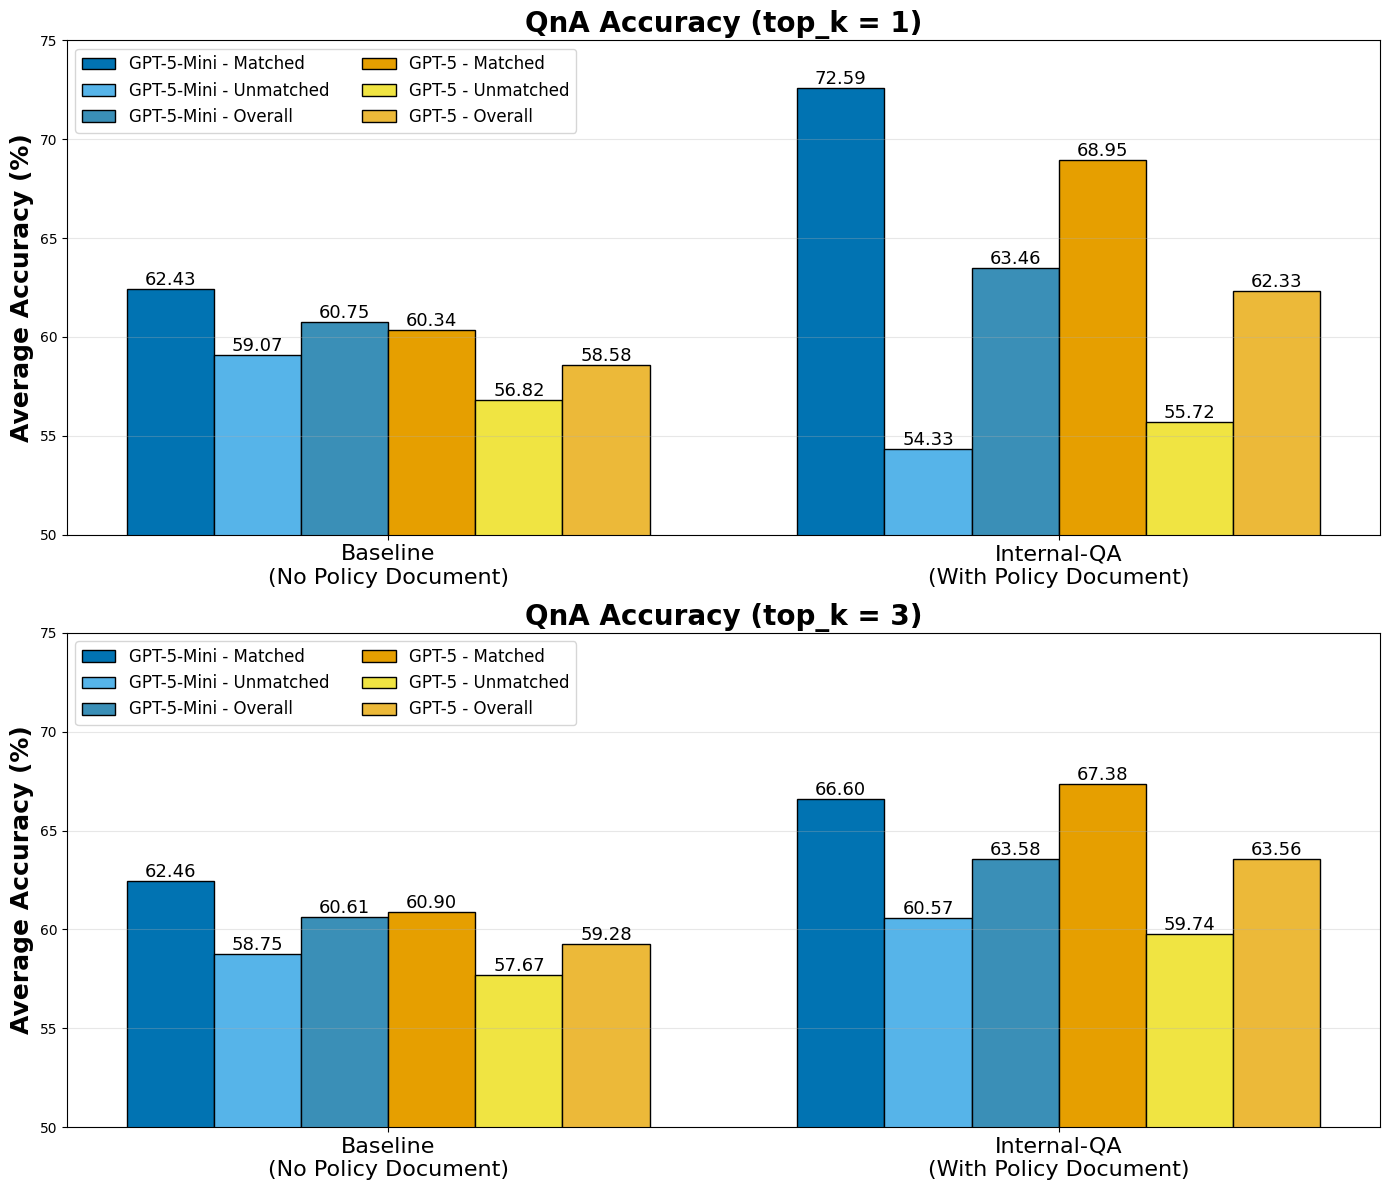

In [19]:
colors = {
    'gpt5mini_matched': '#0173B2',
    'gpt5mini_unmatched': '#56B4E9',
    'gpt5mini_overall': '#3A8FB7',
    'gpt5_matched': '#E69F00',
    'gpt5_unmatched': '#F0E442',
    'gpt5_overall': '#ECB939'
}

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

for idx, (top_k_val, baseline_data, internal_data, ax) in enumerate([
    (1, baseline_top1, internal_top1, axes[0]),
    (3, baseline_top3, internal_top3, axes[1])
]):
    methods = ['Baseline\n(No Policy Document)', 'Internal-QA\n(With Policy Document)']
    
    # 데이터 준비
    gpt5mini_matched = [baseline_data['gpt_5_mini_matched'], internal_data['gpt_5_mini_matched']]
    gpt5mini_unmatched = [baseline_data['gpt_5_mini_unmatched'], internal_data['gpt_5_mini_unmatched']]
    gpt5mini_overall = [baseline_data['gpt_5_mini_overall'], internal_data['gpt_5_mini_overall']]
    gpt5_matched = [baseline_data['gpt_5_matched'], internal_data['gpt_5_matched']]
    gpt5_unmatched = [baseline_data['gpt_5_unmatched'], internal_data['gpt_5_unmatched']]
    gpt5_overall = [baseline_data['gpt_5_overall'], internal_data['gpt_5_overall']]
    
    x = np.arange(len(methods))
    width = 0.13
    
    # Bar 그리기
    bars1 = ax.bar(x - 2.5*width, gpt5mini_matched, width, label='GPT-5-Mini - Matched',
                   color=colors['gpt5mini_matched'], edgecolor='black', linewidth=1)
    bars2 = ax.bar(x - 1.5*width, gpt5mini_unmatched, width, label='GPT-5-Mini - Unmatched',
                   color=colors['gpt5mini_unmatched'], edgecolor='black', linewidth=1)
    bars3 = ax.bar(x - 0.5*width, gpt5mini_overall, width, label='GPT-5-Mini - Overall',
                   color=colors['gpt5mini_overall'], edgecolor='black', linewidth=1)
    bars4 = ax.bar(x + 0.5*width, gpt5_matched, width, label='GPT-5 - Matched',
                   color=colors['gpt5_matched'], edgecolor='black', linewidth=1)
    bars5 = ax.bar(x + 1.5*width, gpt5_unmatched, width, label='GPT-5 - Unmatched',
                   color=colors['gpt5_unmatched'], edgecolor='black', linewidth=1)
    bars6 = ax.bar(x + 2.5*width, gpt5_overall, width, label='GPT-5 - Overall',
                   color=colors['gpt5_overall'], edgecolor='black', linewidth=1)
    
    # 라벨 및 스타일
    ax.set_ylabel('Average Accuracy (%)', fontsize=18, fontweight='bold')
    ax.set_title(f'QnA Accuracy (top_k = {top_k_val})', fontsize=20, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(methods, fontsize=16)
    ax.legend(fontsize=12, loc='upper left', ncol=2)
    ax.set_ylim(50, 75)
    ax.grid(axis='y', alpha=0.3)
    
    # 값 표시
    for bars in [bars1, bars2, bars3, bars4, bars5, bars6]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.2f}', ha='center', va='bottom', fontsize=13)

plt.tight_layout()
plt.show()

In [20]:
def calculate_averages_each(matched_df, unmatched_df, top_k_val):
    """top_k별로 평균 accuracy 계산"""
    results = {}
    
    for qna_model in ['gpt-5-mini', 'gpt-5']:
        # Matched
        matched_data = matched_df[
            (matched_df['top_k'] == top_k_val) & 
            (matched_df['qna_model'] == qna_model)
        ]['accuracy']
        
        # Unmatched (하이픈과 언더스코어 둘 다 체크)
        qna_model_underscore = qna_model.replace('-', '_')
        unmatched_data = unmatched_df[
            (unmatched_df['top_k'] == top_k_val) & 
            ((unmatched_df['qna_model'] == qna_model) | 
             (unmatched_df['qna_model'] == qna_model_underscore))
        ]['accuracy']
        
        matched_avg = matched_data.mean() if len(matched_data) > 0 else 0
        unmatched_avg = unmatched_data.mean() if len(unmatched_data) > 0 else 0
        
        model_key = qna_model.replace('-', '_')
        results[f'{model_key}_matched'] = matched_avg
        results[f'{model_key}_unmatched'] = unmatched_avg
    
    # 전체 평균: 해당 top_k의 모든 데이터 (모델 구분 없이)
    all_matched = matched_df[matched_df['top_k'] == top_k_val]['accuracy']
    all_unmatched = unmatched_df[unmatched_df['top_k'] == top_k_val]['accuracy']
    
    # matched와 unmatched 모두 합쳐서 전체 평균
    all_data = pd.concat([all_matched, all_unmatched])
    results['overall_mean'] = all_data.mean() if len(all_data) > 0 else 0
    
    return results

In [21]:
baseline_top1 = calculate_averages_each(baseline_matched_df, baseline_unmatched_df, 1)
internal_top1 = calculate_averages_each(rag_matched_df, rag_unmatched_df, 1)

baseline_top3 = calculate_averages_each(baseline_matched_df, baseline_unmatched_df, 3)
internal_top3 = calculate_averages_each(rag_matched_df, rag_unmatched_df, 3)

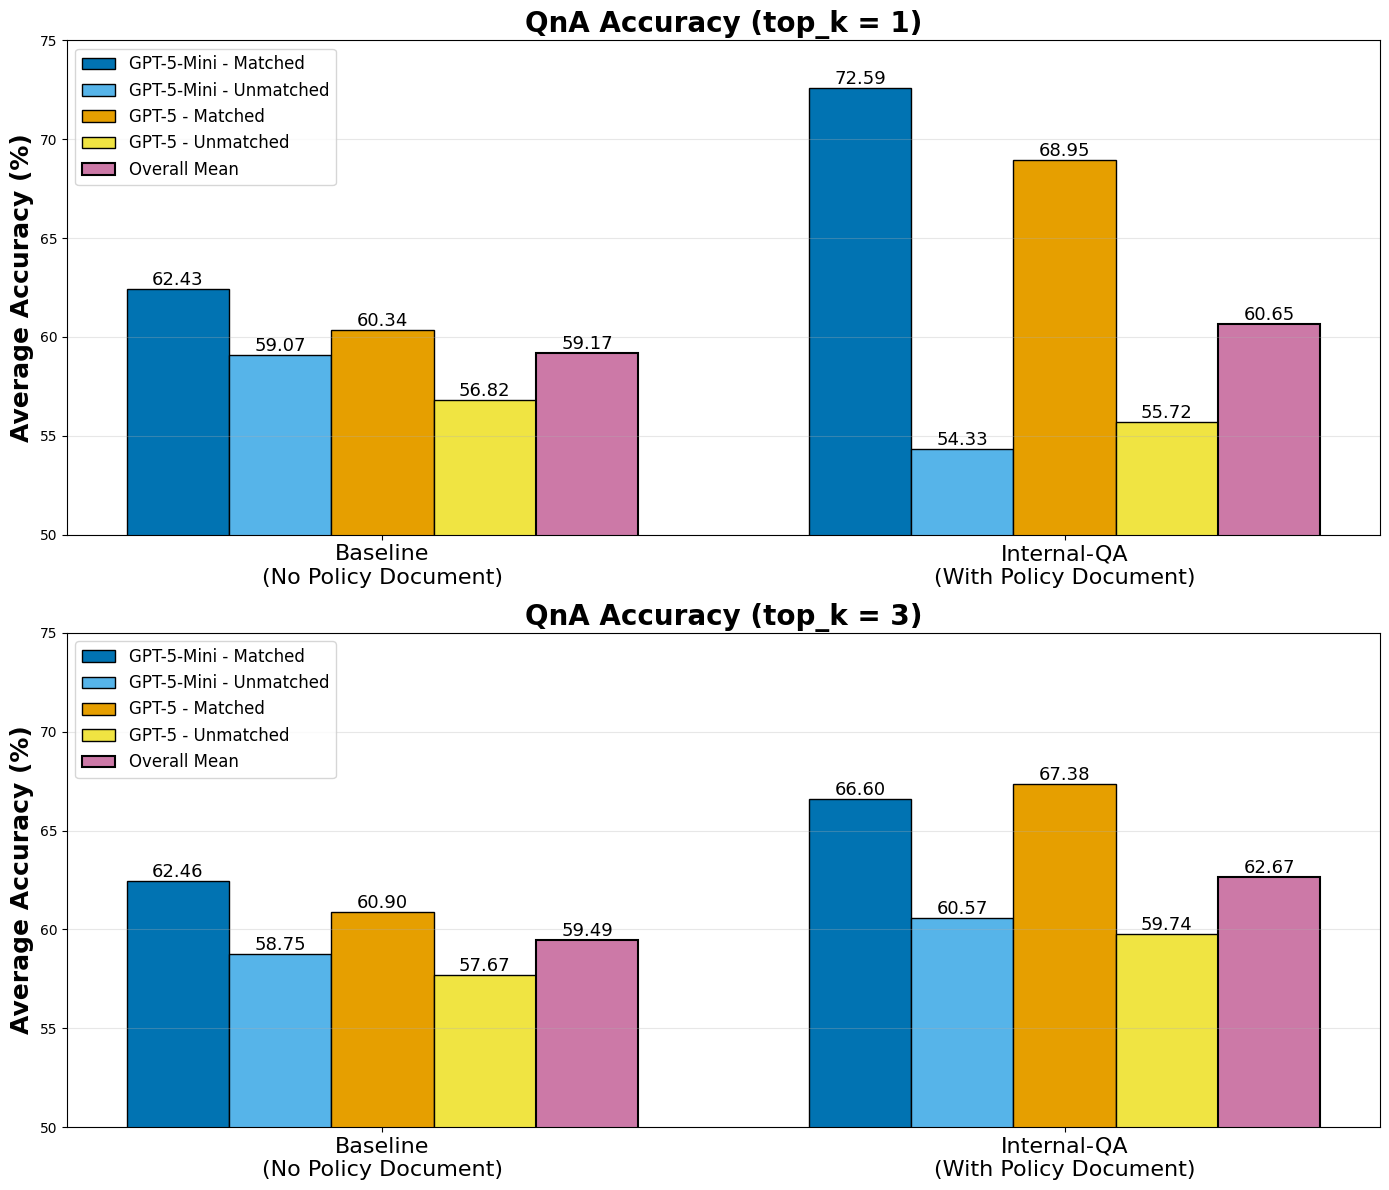

In [22]:
colors = {
    'gpt5mini_matched': '#0173B2',
    'gpt5mini_unmatched': '#56B4E9',
    'gpt5_matched': '#E69F00',
    'gpt5_unmatched': '#F0E442',
    'overall_mean': '#CC79A7' 
}

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

for idx, (top_k_val, baseline_data, internal_data, ax) in enumerate([
    (1, baseline_top1, internal_top1, axes[0]),
    (3, baseline_top3, internal_top3, axes[1])
]):
    methods = ['Baseline\n(No Policy Document)', 'Internal-QA\n(With Policy Document)']
    
    # 데이터 준비
    gpt5mini_matched = [baseline_data['gpt_5_mini_matched'], internal_data['gpt_5_mini_matched']]
    gpt5mini_unmatched = [baseline_data['gpt_5_mini_unmatched'], internal_data['gpt_5_mini_unmatched']]
    gpt5_matched = [baseline_data['gpt_5_matched'], internal_data['gpt_5_matched']]
    gpt5_unmatched = [baseline_data['gpt_5_unmatched'], internal_data['gpt_5_unmatched']]
    overall_mean = [baseline_data['overall_mean'], internal_data['overall_mean']]
    
    x = np.arange(len(methods))
    width = 0.15
    
    # Bar 그리기
    bars1 = ax.bar(x - 2*width, gpt5mini_matched, width, label='GPT-5-Mini - Matched',
                   color=colors['gpt5mini_matched'], edgecolor='black', linewidth=1)
    bars2 = ax.bar(x - width, gpt5mini_unmatched, width, label='GPT-5-Mini - Unmatched',
                   color=colors['gpt5mini_unmatched'], edgecolor='black', linewidth=1)
    bars3 = ax.bar(x, gpt5_matched, width, label='GPT-5 - Matched',
                   color=colors['gpt5_matched'], edgecolor='black', linewidth=1)
    bars4 = ax.bar(x + width, gpt5_unmatched, width, label='GPT-5 - Unmatched',
                   color=colors['gpt5_unmatched'], edgecolor='black', linewidth=1)
    bars5 = ax.bar(x + 2*width, overall_mean, width, label='Overall Mean',
                   color=colors['overall_mean'], edgecolor='black', linewidth=1.5)
    
    # 라벨 및 스타일
    ax.set_ylabel('Average Accuracy (%)', fontsize=18, fontweight='bold')
    ax.set_title(f'QnA Accuracy (top_k = {top_k_val})', fontsize=20, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(methods, fontsize=16)
    ax.legend(fontsize=12, loc='upper left')
    ax.set_ylim(50, 75)
    ax.grid(axis='y', alpha=0.3)
    
    # 값 표시
    for bars in [bars1, bars2, bars3, bars4, bars5]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.2f}', ha='center', va='bottom', fontsize=13)

plt.tight_layout()
plt.show()

In [12]:
df_matched = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_baseline_matched_results_merged_with_accuracy.csv')
df_unmatched = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_baseline_unmatched_results_merged_with_accuracy.csv')

df_matched['match'] = 1
df_unmatched['match'] = 0

df_baseline_combined = pd.concat([df_matched, df_unmatched], ignore_index=True)
df_baseline_combined['representation'] = 'Baseline'

df_baseline_combined.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/baseline_combined_results.csv', index=False)

In [13]:
df_rag_matched = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_rag_matched_results_merged_with_accuracy.csv')
df_rag_unmatched = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_sentence_unmatched_results_merged_with_accuracy.csv')

df_rag_matched['match'] = 1
df_rag_unmatched['match'] = 0

df_rag_combined = pd.concat([df_rag_matched, df_rag_unmatched], ignore_index=True)
df_rag_combined['representation'] = 'Internal-QA_SentenceTransformer'

df_rag_combined.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/rag_combined_results.csv', index=False)

In [18]:
df_openai_matched_dir = '/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_matched_results_merged.csv'
df_openai_unmatched_dir = '/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_openai_unmatched_results_merged.csv'

openai_matched_df = add_accuracy_column(
    merged_csv_path=df_openai_matched_dir,
    ground_truth_json_path=ground_truth_json_path,
    output_path=df_openai_matched_dir.replace(".csv", "_with_accuracy.csv")
)

openai_unmatched_df = add_accuracy_column(
    merged_csv_path=df_openai_unmatched_dir,
    ground_truth_json_path=ground_truth_json_path,
    output_path=df_openai_unmatched_dir.replace(".csv", "_with_accuracy.csv")
)

openai_matched_df = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_matched_results_merged_with_accuracy.csv')
openai_unmatched_df = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_openai_unmatched_results_merged_with_accuracy.csv')

openai_matched_df['match'] = 1
openai_unmatched_df['match'] = 0
openai_combined_df = pd.concat([openai_matched_df, openai_unmatched_df], ignore_index=True)
openai_combined_df['representation'] = openai_combined_df['combo_folder'].apply(
    lambda x: 'Internal-QA_OpenAI_header' if 'header' in x
    else 'Internal-QA_OpenAI_whole'
)
openai_combined_df.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/openai_combined_results.csv', index=False)


   location: /home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_matched_results_merged_with_accuracy.csv
   Total rows: 495
   Average accuracy: 68.96%
   location: /home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_openai_unmatched_results_merged_with_accuracy.csv
   Total rows: 141
   Average accuracy: 56.74%


In [19]:
all_qna_combined = pd.concat([df_baseline_combined, df_rag_combined, openai_combined_df], ignore_index=True)
all_qna_combined.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/all_qna_combined_results.csv', index=False)

In [20]:

df_filtered = all_qna_combined[(all_qna_combined['retrieval_model'] == 'gpt-5-mini') & (all_qna_combined['qna_model'] == 'gpt-5-mini')]
df_filtered.head()

,case_id,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,retrieval_count,combo_folder,retrieval_model,qna_model,correct,total,accuracy,match,representation,error
0,Case10075,CMA,Not Specified,Not Specified,Not Specified,Not Specified,Yes,Yes,81228,Yes,...,10,top1_10retrieve_gpt_5_mini_gpt_5_mini,gpt-5-mini,gpt-5-mini,4,9,44.444444,1,Baseline,NaN
1,Case11795,WES,Yes,Not Specified,Yes,Yes,Yes,Yes,81415,Yes,...,10,top1_10retrieve_gpt_5_mini_gpt_5_mini,gpt-5-mini,gpt-5-mini,8,9,88.888889,1,Baseline,NaN
2,Case12792,BRCA1/2,Not Specified,Not Specified,No,Not Specified,No,Yes,Not Specified,No,...,10,top1_10retrieve_gpt_5_mini_gpt_5_mini,gpt-5-mini,gpt-5-mini,8,9,88.888889,1,Baseline,NaN
3,Case13983,WGS,Yes,Not Specified,Yes,Not Specified,Yes,Yes,81425,Yes,...,10,top1_10retrieve_gpt_5_mini_gpt_5_mini,gpt-5-mini,gpt-5-mini,7,9,77.777778,1,Baseline,NaN
4,Case14017,WES,Not Specified,Not Specified,Yes,No,Yes,Yes,81415,No,...,10,top1_10retrieve_gpt_5_mini_gpt_5_mini,gpt-5-mini,gpt-5-mini,4,9,44.444444,1,Baseline,NaN


In [26]:
all_qna_combined['qna_model_unified'] = all_qna_combined['qna_model'].str.replace('_', '-')
all_qna_combined['retrieval_model_unified'] = all_qna_combined['retrieval_model'].str.replace('_', '-')


df_filtered = all_qna_combined[
    (all_qna_combined['qna_model_unified'] == 'gpt-5-mini') & 
    (all_qna_combined['retrieval_model_unified'] == 'gpt-5-mini')
]


print(df_filtered['representation'].value_counts())

representation
Baseline                           424
Internal-QA_SentenceTransformer    424
Internal-QA_OpenAI_header          424
Internal-QA_OpenAI_whole           212
Name: count, dtype: int64


In [29]:
summary = df_filtered.groupby(['representation', 'top_k', 'retrieval_count', 'match']).agg({
    'accuracy': 'mean',
    'case_id': 'count'
}).reset_index()

pivot = summary.pivot_table(
    index=['representation', 'top_k', 'retrieval_count'],
    columns='match',
    values=['accuracy', 'case_id']
).reset_index()

pivot.columns = ['Representation', 'Top-K', 'Top-C', 
                 'Unmatched_Acc', 'Matched_Acc', 
                 'Sample_Unmatched', 'Sample_Matched']

print(pivot.round(2))

                     Representation  Top-K  Top-C  Unmatched_Acc  Matched_Acc  \
0                          Baseline      1     10          60.63        61.73   
1                          Baseline      1     30          57.41        61.94   
2                          Baseline      3     10          58.94        63.36   
3                          Baseline      3     30          59.15        62.06   
4         Internal-QA_OpenAI_header      1     10          44.44        67.87   
5         Internal-QA_OpenAI_header      1     30          56.67        68.60   
6         Internal-QA_OpenAI_header      3     10          56.04        68.54   
7         Internal-QA_OpenAI_header      3     30          63.16        71.01   
8          Internal-QA_OpenAI_whole      1     10          58.02        70.32   
9          Internal-QA_OpenAI_whole      3     10          63.33        67.57   
10  Internal-QA_SentenceTransformer      1     10          55.71        71.60   
11  Internal-QA_SentenceTran

In [38]:
df_filtered2 = all_qna_combined[
    (all_qna_combined['qna_model_unified'] == 'gpt-5') & 
    (all_qna_combined['retrieval_model_unified'] == 'gpt-5')
]

print(df_filtered2['representation'].value_counts())

summary2 = df_filtered2.groupby(['representation', 'top_k', 'retrieval_count', 'match']).agg({
    'accuracy': 'mean',
    'case_id': 'count'
}).reset_index()

pivot2 = summary2.pivot_table(
    index=['representation', 'top_k', 'retrieval_count'],
    columns='match',
    values=['accuracy', 'case_id']
).reset_index()

pivot2.columns = ['Representation', 'Top-K', 'Top-C', 
                 'Unmatched_Acc', 'Matched_Acc', 
                 'Sample_Unmatched', 'Sample_Matched']

print(pivot2.round(2))

representation
Baseline                           424
Internal-QA_SentenceTransformer    424
Name: count, dtype: int64
                    Representation  Top-K  Top-C  Unmatched_Acc  Matched_Acc  \
0                         Baseline      1     10          57.14        60.19   
1                         Baseline      1     30          56.22        59.83   
2                         Baseline      3     10          58.13        59.16   
3                         Baseline      3     30          58.46        62.33   
4  Internal-QA_SentenceTransformer      1     10          56.19        69.14   
5  Internal-QA_SentenceTransformer      1     30          57.88        68.09   
6  Internal-QA_SentenceTransformer      3     10          58.45        69.07   
7  Internal-QA_SentenceTransformer      3     30          61.03        66.94   

   Sample_Unmatched  Sample_Matched  
0              70.0            36.0  
1              67.0            39.0  
2              69.0            37.0  
3       

In [36]:
openai_match_info = all_qna_combined[
    all_qna_combined['representation'] == 'Internal-QA_OpenAI_header'
][['case_id', 'top_k', 'retrieval_count', 'match']].copy()

openai_match_info.rename(columns={'match': 'match_openai_header'}, inplace=True)
print(openai_match_info['match_openai_header'].value_counts())

baseline_data = all_qna_combined[all_qna_combined['representation'] == 'Baseline'].copy()

baseline_openai_header = baseline_data.merge(
    openai_match_info, 
    on=['case_id', 'top_k', 'retrieval_count'],
    how='inner'
)
print(baseline_openai_header)

match_openai_header
1    339
0     85
Name: count, dtype: int64
        case_id       Q0             Q1             Q2             Q3  \
0     Case10075      CMA  Not Specified  Not Specified  Not Specified   
1     Case11795      WES            Yes  Not Specified            Yes   
2     Case12792  BRCA1/2  Not Specified  Not Specified             No   
3     Case13983      WGS            Yes  Not Specified            Yes   
4     Case14017      WES  Not Specified  Not Specified            Yes   
...         ...      ...            ...            ...            ...   
1691   Case8621      WES            Yes  Not Specified            Yes   
1692   Case8661      WGS            Yes  Not Specified            Yes   
1693   Case8710      WES            Yes  Not Specified            Yes   
1694    Case950      WES  Not Specified            Yes            Yes   
1695   Case9978      WES            Yes            Yes            Yes   

                 Q4   Q5   Q6             Q7   Q8  ...   qn

In [37]:
baseline_openai_header_filtered = baseline_openai_header[
    (baseline_openai_header['qna_model_unified'] == 'gpt-5-mini') & 
    (baseline_openai_header['retrieval_model_unified'] == 'gpt-5-mini')
]

# 설정별 accuracy 계산
summary = baseline_openai_header_filtered.groupby(['top_k', 'retrieval_count', 'match_openai_header']).agg({
    'accuracy': 'mean',
    'case_id': 'count'
}).reset_index()

print(summary.round(2))


   top_k  retrieval_count  match_openai_header  accuracy  case_id
0      1               10                    0     56.52       23
1      1               10                    1     62.25       83
2      1               30                    0     57.78       20
3      1               30                    1     59.43       86
4      3               10                    0     55.56       23
5      3               10                    1     61.85       83
6      3               30                    0     52.05       19
7      3               30                    1     62.07       87


In [ ]:
4               23.0            83.0  
5               20.0            86.0  
6               23.0            83.0  
7               19.0            87.0  